In [191]:
import numpy as np
from matplotlib import pyplot as plt
import csv
import time

data = []
y_column = []
with open('data.csv','r')as f:
    rawdata = csv.reader(f)
    for row in rawdata:
        data.append(row[:-1])
        y_column.append(row[-1])
y_column = np.matrix(y_column).astype(np.float)
data = np.matrix(data).astype(np.float)


In [192]:
means = np.mean(data,axis=0)
var = np.sqrt(np.var(data,axis=0))
data = (data-means)/var

In [193]:
def hessian(x):
    n = x.shape[0]
    d = x.shape[1]
    H = np.zeros((d,d))
    for i in range(d):
        for j in range(d):
            sum=0
            for k in range(n):
                sum += x[k,i] * x[k,j]
            H[i][j] = sum/d 
    return 2*H

In [194]:
H = hessian(data)
H_inv = np.linalg.inv(H)

In [195]:
print(np.dot(np.ones(5),data[1].T).shape)
print(y_column[0,1])
print(np.zeros(5).reshape((1,5)).shape)

(1, 1)
125.201
(1, 5)


In [196]:
def devfunc(w):
    n = data.shape[0]
    d = data.shape[1]
    sum_mat = np.zeros(d)
    for i in range(n):
        store = y_column[0,i] - np.dot(w, data[i].T)
        store = (-1) * store * data[i]
        sum_mat = sum_mat + store
    return sum_mat * 2/n

In [197]:
def normal_grad(learn=0.01,theta=0.01):
    n = data.shape[0]
    d = data.shape[1]
    
    w_old = np.ones(d).reshape((1,5))
    w_new = np.zeros(d).reshape((1,5))
    
    iters=0
    while(np.linalg.norm(w_old-w_new)>theta):
        dev = devfunc(w_old)
        w_old = w_new
        w_new = w_new - learn * dev
        iters+=1
        print(w_new,iters)
    return iters

In [198]:
start1 = time.time()
itcount1 = normal_grad()
end1 = time.time()
time1 = end1-start1 

[[-0.06643237 -0.04222189 -0.03806141 -0.00658964 -0.06909504]] 1
[[-0.12032211 -0.06375337 -0.07063451  0.01066544 -0.11222067]] 2
[[-0.17341669 -0.08413828 -0.10318226  0.02827692 -0.15380258]] 3
[[-0.22579792 -0.10408591 -0.13549169  0.0457117  -0.19458805]] 4
[[-0.2774693  -0.12363828 -0.16754489  0.0629593  -0.23462144]] 5
[[-0.32843854 -0.14280964 -0.19933861  0.08002089 -0.27392093]] 6
[[-0.37871371 -0.16161253 -0.2308706   0.09689788 -0.31250314]] 7
[[-0.42830289 -0.18005897 -0.26213891  0.1135917  -0.35038413]] 8
[[-0.47721412 -0.19816049 -0.2931418   0.13010381 -0.38757947]] 9
[[-0.52545545 -0.21592817 -0.3238778   0.14643563 -0.42410423]] 10
[[-0.5730349  -0.23337263 -0.35434564  0.16258864 -0.45997305]] 11
[[-0.61996045 -0.25050411 -0.38454425  0.17856427 -0.49520013]] 12
[[-0.66624005 -0.26733242 -0.41447279  0.194364   -0.52979923]] 13
[[-0.71188165 -0.283867   -0.44413057  0.20998927 -0.56378373]] 14
[[-0.75689311 -0.30011691 -0.47351711  0.22544157 -0.59716661]] 15
[[-0

[[-3.24539794 -1.2765293  -2.35209232  1.16853508 -2.2225332 ]] 124
[[-3.25499901 -1.28190417 -2.36075392  1.17264757 -2.227301  ]] 125
[[-3.26446907 -1.28724398 -2.36931745  1.17670945 -2.23197315]] 126
[[-3.27381001 -1.29254912 -2.37778409  1.18072133 -2.23655107]] 127
[[-3.28302366 -1.29781997 -2.38615501  1.18468385 -2.24103617]] 128
[[-3.29211185 -1.3030569  -2.39443138  1.18859761 -2.24542984]] 129
[[-3.30107636 -1.30826027 -2.40261434  1.19246322 -2.24973345]] 130
[[-3.30991897 -1.31343046 -2.41070502  1.19628129 -2.25394834]] 131
[[-3.31864142 -1.3185678  -2.41870453  1.2000524  -2.25807585]] 132
[[-3.32724541 -1.32367265 -2.42661399  1.20377714 -2.26211729]] 133
[[-3.33573264 -1.32874535 -2.43443449  1.2074561  -2.26607394]] 134
[[-3.34410478 -1.33378623 -2.44216711  1.21108983 -2.26994708]] 135
[[-3.35236346 -1.33879563 -2.44981291  1.21467892 -2.27373796]] 136
[[-3.36051031 -1.34377388 -2.45737296  1.21822391 -2.27744782]] 137
[[-3.3685469  -1.34872129 -2.46484829  1.2217253

In [199]:
def newton_grad(learn=0.01,theta=0.01):
    n = data.shape[0]
    d = data.shape[1]
    
    w_old = np.ones(d).reshape((1,5))
    w_new = np.zeros(d).reshape((1,5))
    
    iters=0
    while(np.linalg.norm(w_old-w_new)>theta):
        dev = devfunc(w_old)
        w_old = w_new
        w_new = w_new - np.dot(dev,H_inv)
        iters+=1
        print(w_new,iters)
    return iters

In [200]:
start = time.time()
itcount2 = newton_grad()
end = time.time()
time2 = end-start

[[-0.01676948 -0.0116304  -0.01442838  0.0018446  -0.00976844]] 1
[[-0.03021229 -0.01993411 -0.02553008  0.00701589 -0.01621019]] 2
[[-0.0435993  -0.02819913 -0.03658378  0.01218104 -0.02261945]] 3
[[-0.0569416  -0.03643654 -0.04760055  0.01732898 -0.02900728]] 4
[[-0.07023936 -0.04464644 -0.05858055  0.02245974 -0.03537379]] 5
[[-0.08349274 -0.05282894 -0.06952389  0.02757338 -0.04171905]] 6
[[-0.09670188 -0.06098413 -0.08043072  0.03266995 -0.04804313]] 7
[[-0.10986693 -0.0691121  -0.09130113  0.03774951 -0.0543461 ]] 8
[[-0.12298804 -0.07721294 -0.10213526  0.04281211 -0.06062803]] 9
[[-0.13606535 -0.08528675 -0.11293323  0.04785781 -0.06688899]] 10
[[-0.14909901 -0.0933336  -0.12369516  0.05288667 -0.07312906]] 11
[[-0.16208917 -0.10135359 -0.13442117  0.05789875 -0.0793483 ]] 12
[[-0.17503597 -0.10934682 -0.14511137  0.0628941  -0.08554677]] 13
[[-0.18793955 -0.11731336 -0.1557659   0.06787277 -0.09172456]] 14
[[-0.20080007 -0.12525331 -0.16638486  0.07283483 -0.09788173]] 15
[[-0

[[-1.37360037 -0.84932848 -1.13476911  0.52534399 -0.65937791]] 124
[[-1.38250336 -0.8548251  -1.14212034  0.52877909 -0.66364035]] 125
[[-1.39137664 -0.86030337 -1.14944702  0.53220272 -0.66788857]] 126
[[-1.40022029 -0.86576336 -1.15674925  0.53561492 -0.6721226 ]] 127
[[-1.40903443 -0.87120512 -1.16402711  0.53901574 -0.67634251]] 128
[[-1.41781915 -0.87662872 -1.17128068  0.54240521 -0.68054833]] 129
[[-1.42657455 -0.88203421 -1.17851003  0.54578336 -0.68474011]] 130
[[-1.43530072 -0.88742166 -1.18571525  0.54915023 -0.6889179 ]] 131
[[-1.44399777 -0.89279113 -1.19289643  0.55250587 -0.69308174]] 132
[[-1.45266578 -0.89814268 -1.20005363  0.55585031 -0.69723169]] 133
[[-1.46130487 -0.90347637 -1.20718695  0.55918358 -0.70136778]] 134
[[-1.46991512 -0.90879225 -1.21429645  0.56250573 -0.70549007]] 135
[[-1.47849663 -0.91409039 -1.22138223  0.56581679 -0.7095986 ]] 136
[[-1.48704949 -0.91937084 -1.22844435  0.5691168  -0.71369342]] 137
[[-1.49557381 -0.92463367 -1.2354829   0.5724057

In [201]:
def opt_grad(theta=0.01):
    n = data.shape[0]
    d = data.shape[1]
    
    w_old = np.ones(d).reshape((1,5))
    w_new = np.zeros(d).reshape((1,5))
    
    iters=0
    while(np.linalg.norm(w_old-w_new)>theta):
        dev = devfunc(w_old)
        w_old = w_new
        learn = np.power(np.linalg.norm(dev), 2) / (np.dot(np.dot(dev,H.T),dev.T))
        w_new = w_new - learn * dev
        iters+=1
        print(w_new,iters)
    return iters

In [202]:
start= time.time()
itcount3=opt_grad()
end = time.time()
time3 = end-start

[[-0.01303964 -0.0082875  -0.00747087 -0.00129344 -0.01356229]] 1
[[-0.02573364 -0.01335935 -0.01514362  0.00277108 -0.02372074]] 2
[[-0.03841333 -0.01838709 -0.02282882  0.00685932 -0.03382572]] 3
[[-0.05106032 -0.02339328 -0.03050499  0.01093998 -0.04389197]] 4
[[-0.06367434 -0.02837822 -0.03817177  0.01501285 -0.05391968]] 5
[[-0.07625535 -0.03334204 -0.04582907  0.01907792 -0.06390897]] 6
[[-0.08880335 -0.03828487 -0.05347679  0.02313516 -0.07385995]] 7
[[-0.10131829 -0.04320681 -0.06111482  0.02718456 -0.08377275]] 8
[[-0.11380018 -0.048108   -0.06874307  0.03122609 -0.09364749]] 9
[[-0.12624898 -0.05298855 -0.07636145  0.03525973 -0.10348427]] 10
[[-0.13866469 -0.05784859 -0.08396985  0.03928547 -0.11328322]] 11
[[-0.15104728 -0.06268822 -0.0915682   0.04330329 -0.12304446]] 12
[[-0.16339675 -0.06750757 -0.09915639  0.04731317 -0.1327681 ]] 13
[[-0.17571309 -0.07230676 -0.10673434  0.0513151  -0.14245427]] 14
[[-0.18799628 -0.0770859  -0.11430195  0.05530906 -0.15210308]] 15
[[-0

[[-1.34213764 -0.50385488 -0.87061258  0.44452341 -1.01251366]] 125
[[-1.35093607 -0.50701704 -0.87673076  0.44760887 -1.01874503]] 126
[[-1.35970632 -0.510169   -0.88283487  0.45068644 -1.02495171]] 127
[[-1.36844845 -0.51331082 -0.88892493  0.45375612 -1.0311338 ]] 128
[[-1.37716254 -0.51644257 -0.89500093  0.45681794 -1.03729139]] 129
[[-1.38584866 -0.5195643  -0.90106289  0.45987189 -1.04342457]] 130
[[-1.39450688 -0.52267608 -0.90711079  0.462918   -1.04953344]] 131
[[-1.40313727 -0.52577795 -0.91314466  0.46595627 -1.0556181 ]] 132
[[-1.4117399  -0.52886999 -0.9191645   0.46898672 -1.06167864]] 133
[[-1.42031485 -0.53195223 -0.92517031  0.47200935 -1.06771515]] 134
[[-1.42886219 -0.53502475 -0.9311621   0.47502419 -1.07372774]] 135
[[-1.43738199 -0.5380876  -0.93713988  0.47803124 -1.07971649]] 136
[[-1.44587433 -0.54114084 -0.94310365  0.48103051 -1.08568149]] 137
[[-1.45433927 -0.54418451 -0.94905343  0.48402201 -1.09162285]] 138
[[-1.46277689 -0.54721868 -0.95498922  0.4870057

<BarContainer object of 3 artists>

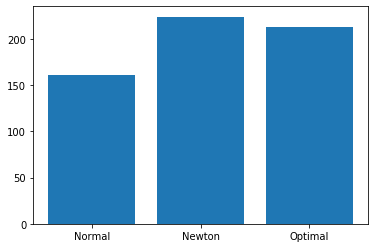

In [203]:
plt.bar(['Normal','Newton','Optimal'],[itcount1,itcount2,itcount3])


<BarContainer object of 3 artists>

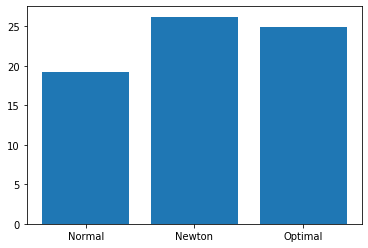

In [204]:
plt.bar(['Normal','Newton','Optimal'],[time1,time2,time3])
